In [ ]:
# gaussian processes probably 1 dim to start off with

In [2]:
%%capture output
%pip install numpy
%pip install matplotlib
%pip install math

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

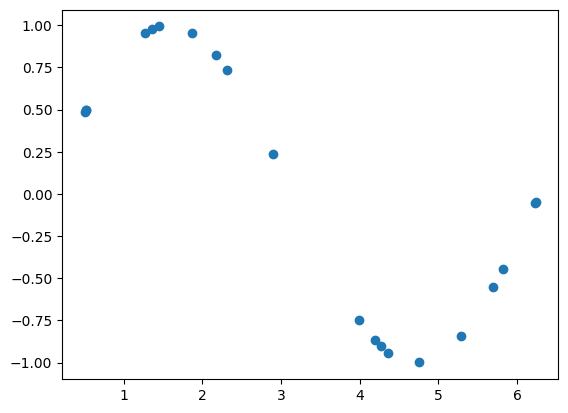

In [46]:
def some_unknown_function(X):
    return np.sin(X)
    return [math.sin(x) for x in X]

def check_dist(X):
    plt.plot(X,some_unknown_function(X),'o')
    return

X = np.random.rand(20)*2*(math.pi)
y = some_unknown_function(X)
check_dist(X)

ok so i need ot work out some mean function m inbetween the bounds (0-2pi) then choose a kernel function or distribution of kernel functions that can be sampled from? use that to make the covar matrix, then i think there is some build in thing that save me reading through 4 pages of equations to get the the solution??? idk

In [75]:
# max corr from this is 1 so s.d vector * gauss_corr
# to get the covar matrix
def gauss_corr(theta_vec, a_vec, b_vec):
    # a and b are points they could be scalar or vector
    exponent = 0
    for theta,a,b in zip(theta_vec,a_vec, b_vec):
        exponent += -theta*(a-b)**2
        
    return (math.e)**exponent

#this sends of x1x1 x1x2 and so on to the guass_corr calc
# for 1 input x this isn't all that important but higher dims
def gauss_corr_handler(theta_vec, X):
    R = []
    X = np.array(X)
    X_shape = (X.shape)[0]
    R = np.zeros((X_shape,X_shape))
    for i, x_vec_1 in enumerate(X):
        for j, x_vec_2 in enumerate(X):
            R[i][j] = gauss_corr(theta_vec,x_vec_1,x_vec_2)
    return R

#form [[x1,x2],[x1,x2]]
# I think the first vector would be referred to as X1
X = [[1,1],[1,1],[2,2]]
X = np.array(X)
print(X.shape)
theta_vec = [1,1]
R = gauss_corr_handler(theta_vec, X)
# this output looks correct which is good
# using identical x vals give a load of
# ones which is the expected behaviour ...
print(R)


'''X = np.random.rand(20)*2*(math.pi)
y = some_unknown_function(X)
ans = gauss_corr([1,1],[2,1],[3,4])

print(ans)'''

(3, 2)
[[1.         1.         0.13533528]
 [1.         1.         0.13533528]
 [0.13533528 0.13533528 1.        ]]


'X = np.random.rand(20)*2*(math.pi)\ny = some_unknown_function(X)\nans = gauss_corr([1,1],[2,1],[3,4])\n\nprint(ans)'